# Introduction

AutoUplift is a Python package for automatically evaluating various uplift algorithms to estimate endividual treatment effects.

In this notebook, we use real-world data to demonstrate the use of PipelineRW which can evaluate mutliple algorithms simultaneously,
providing metrics such as unscaled qini coefficients and the qini curve.

#### Imports

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
from autouplift.datasets.utils import get_hillstrom_women_visit
from autouplift.pipelines.pipeline_rw import PipelineRW

## 1. Get Data

The AutoUplift package contains various real-world datasets for uplift modeling. Here, we use the popular Hillstrom dataset.

In [3]:
data = get_hillstrom_women_visit()

In [4]:
data.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,treatment,response
0,10,1,142.44,1,0,1,0,1,1,0
1,6,2,329.08,1,1,0,1,2,0,0
2,7,1,180.65,0,1,1,1,2,1,0
3,2,0,45.34,1,0,2,0,2,1,0
4,6,1,134.83,0,1,1,0,1,1,1


## 2. Run Pipeline

The heart of the AutoUplift package is the PipelineRW class. The pipeline can be used to automatically evaluate a dataset given some pre-defined configuratins, these include:

1. Select the algorithms you want to evaluate
2. Select hyperparameters for each algorithm
3. Select which metrics should be used for the evaluation
4. Selecting the training procedure, for example, k-fold cross-validation vs. single train-test split
5. Define how to log results
6. Define some system-wide parameters such as number of jobs running in parallel or how many threads to use

### 2.1 Basic Usage

Next, we will evaluate the following algorithms using 5-fold CV (<i>cv_number_splits=5</i>)
* Uplift Random Forest with Euclidean Distance (<i>urf_ed</i>)
* Generalized Random Forest (<i>generalized_random_forest</i>)
* Traditional Response Modeling (as a baseline - no uplift modeling method) (<i>traditional</i>)
* Two Model Approach (<i>two_model</i>)

Further, we will plot the qini curve (<i>plot_figures=True</i>) including a legend which provides the value of the unscaled qini coefficient (<i>plot_uqc</i>).

#### Initiate the Pipeline

In [5]:
pipeline = PipelineRW(
    cv_number_splits=5,
    generalized_random_forest=True,
    max_depth=5,
    min_samples_leaf=50,
    min_samples_treatment=10,
    n_estimators=20,
    plot_figures=True,
    plot_uqc=True,
    run_name="Example",
    show_title=True,
    traditional=True,
    two_model=True,
    urf_ed=True,
)

#### Analyze the Given Dataset and Plot the Results

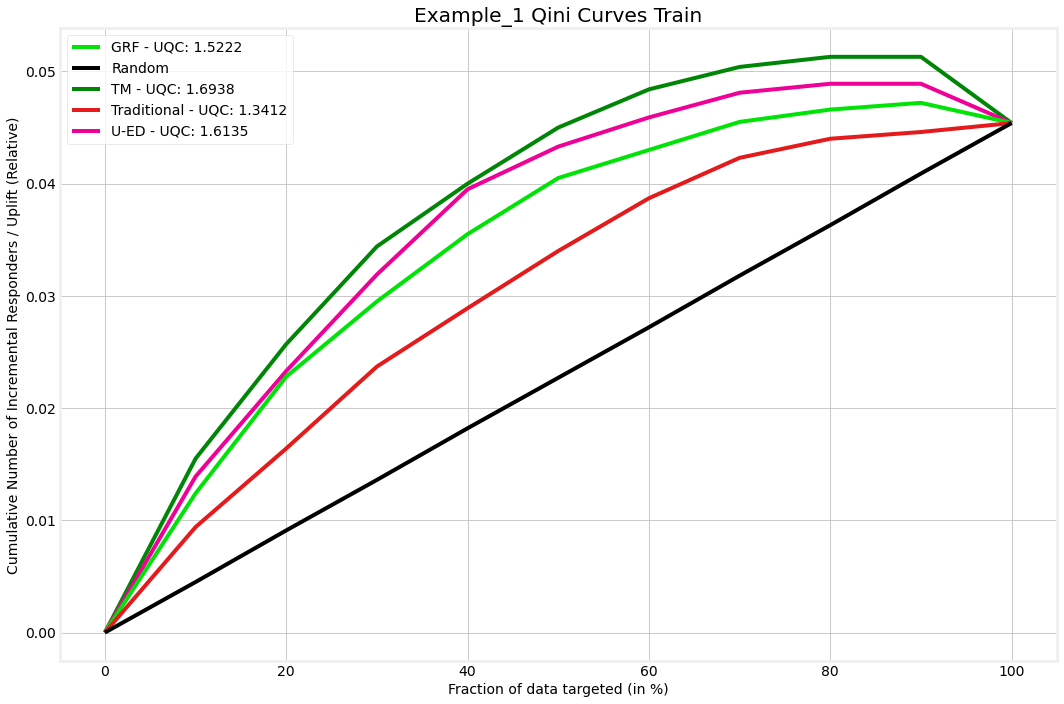

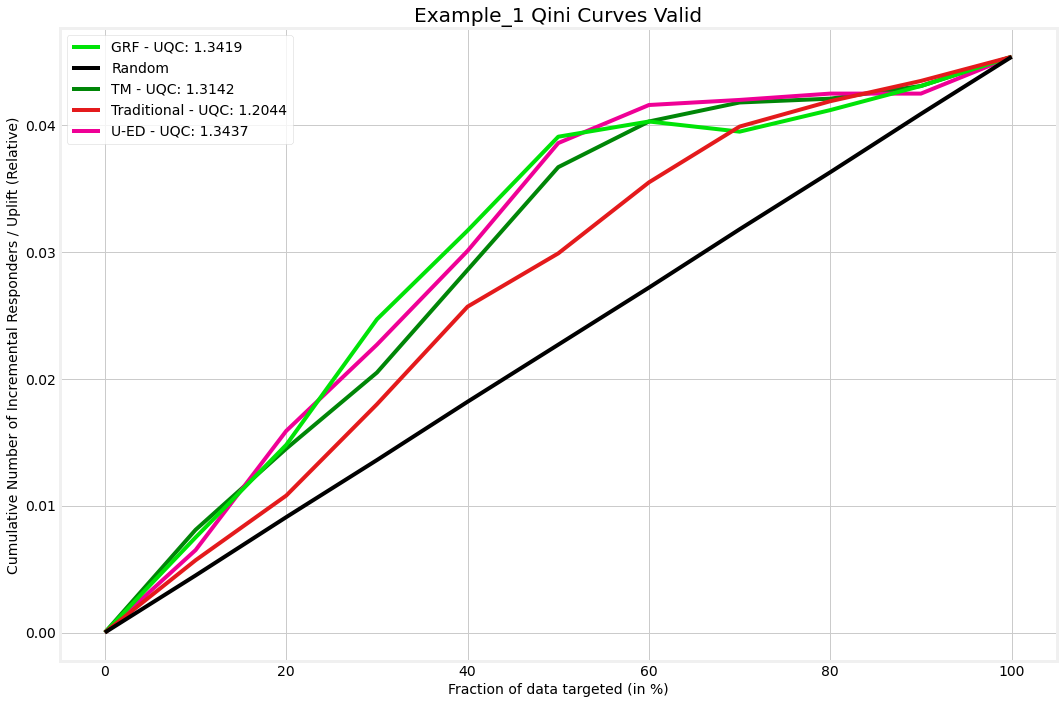

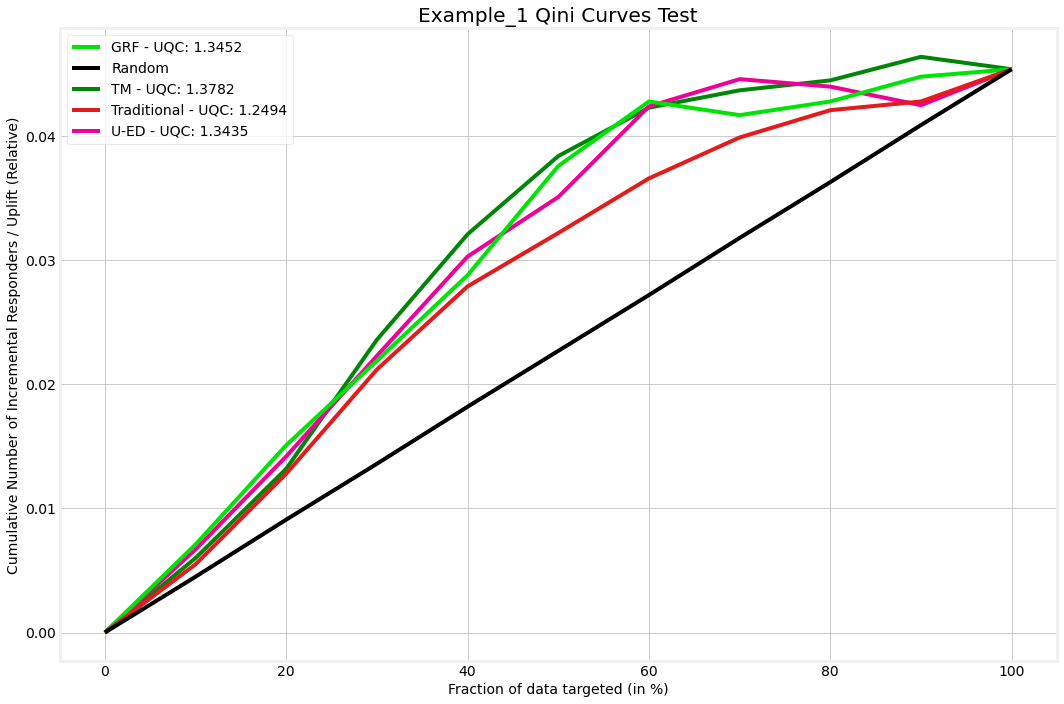

In [6]:
pipeline.analyze_dataset(data)

### 2.2 Advanced Usage

Next, we will evaluate the following algorithms using a single train-validation-test split (cv_number_splits=2):

* Bayesian Causal Forest (<i>bayesian_causal_forest</i>)
* Lai's Generalization (<i>lais_generalization</i>)
* S-Learner (<i>s_learner</i>)
* Delta-delta pi approach (<i>urf_ddp</i>)
* X-Learner (<i>x_learner</i>)

Further, we will use a more informative logging, by setting the logging level to 2 (<i>logging_level=2</i>), we will calculate absolute metrics rather than relative metrics (<i>metrics_calculate_absolute=True</i>), and we will save metrics (<i>metrics_save_metrics=True</i>) and figures (<i>plot_save_figures=True</i>)

In [7]:
pipeline = PipelineRW(
    bayesian_causal_forest=True,
    cv_number_splits=2,
    logging_level=2,
    lais_generalization=True,
    max_depth=5,
    metrics_calculate_absolute=True,
    metrics_save_metrics=True,
    min_samples_leaf=50,
    min_samples_treatment=10,
    n_estimators=20,
    plot_figures=True,
    plot_uqc=True,
    plot_save_figures=True,
    run_name="Example",
    run_id=2,
    slearner=True,
    show_title=True,
    urf_ddp=True,
    xlearner=True
)

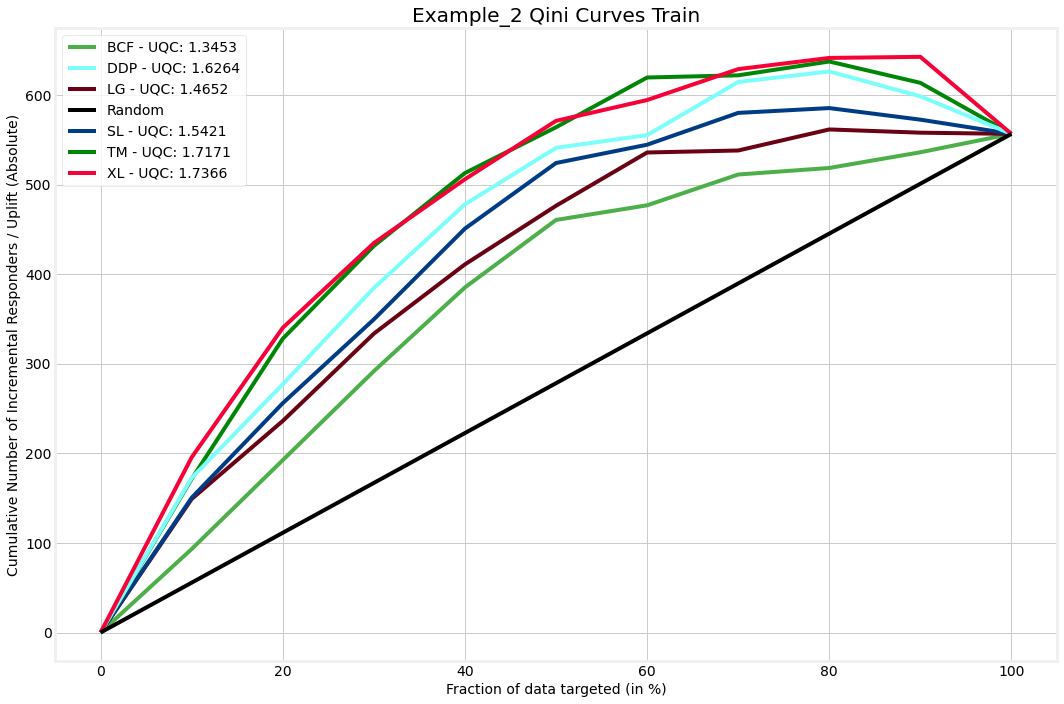

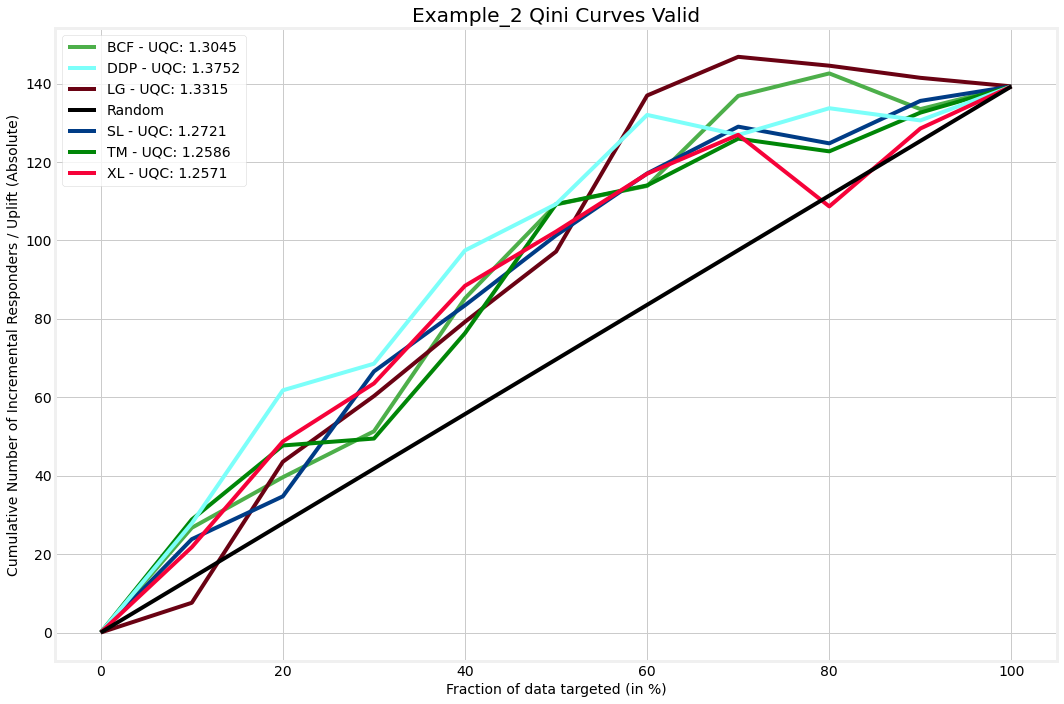

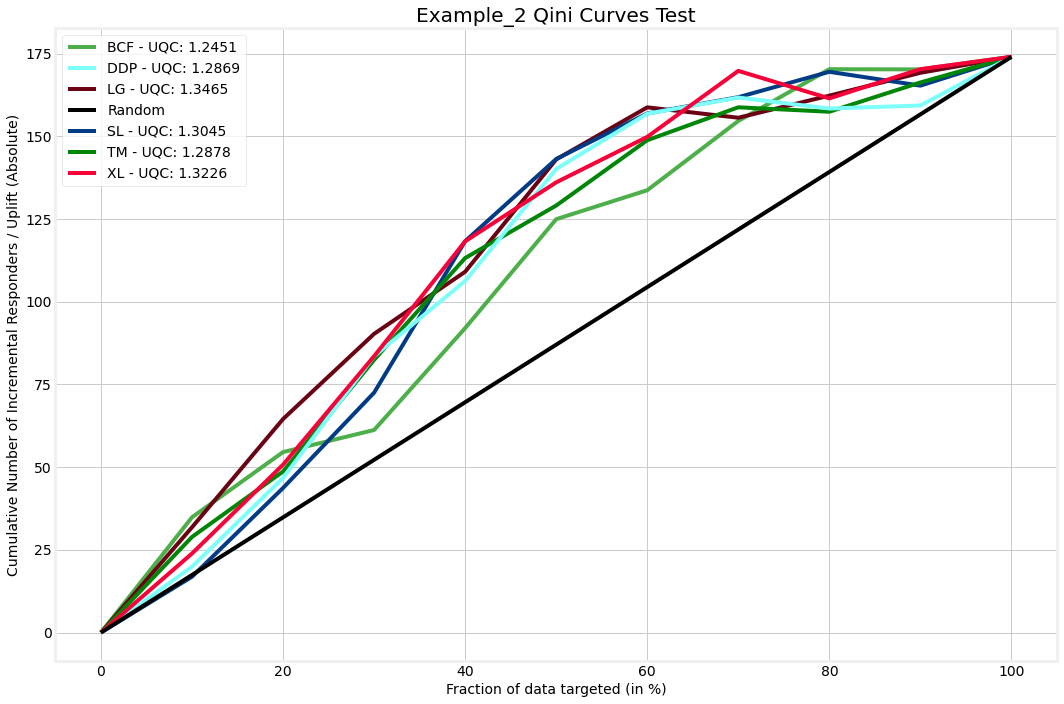

In [8]:
pipeline.analyze_dataset(data)

Three notes:

1. The metrics are stored in your home directory under <i>~/autouplift_output/results/metrics/Example_2/</i>
2. The plots are stored in your home directory under <i>~/autouplift_output/results/figures/Example_2/</i>
2. You will find another directory in <i>autouplift_output</i>, that is <i>data</i>. Data is used as a cache to avoid unpacking and preparing the real-world datasets over and over again.

### 2.3 Advanced II

Next, we will evaluate the following algorithms using a single train-validation-test split (cv_number_splits=2):

* Lai's Generalization (<i>lais_generalization</i>)
* Class Variable Transformation (<i>class_variable_transformation</i>)

Further, we will calculate the feature importance for each method (<i>feature_importance=True</i>), we will use more bins in the qini curves (<i>bins=20</i>), and we will use more jobs to run the algorithms faster (it depends on your computational power).

Note that using more bins in the qini curve comes with more complexity.

In [11]:
pipeline = PipelineRW(
    bins=20,
    class_variable_transformation=True,
    cv_number_splits=2,
    feature_importance=True,
    lais_generalization=True,
    max_depth=5,
    metrics_save_metrics=True,
    min_samples_leaf=50,
    min_samples_treatment=10,
    n_estimators=20,
    n_jobs_=10,
    plot_figures=True,
    plot_uqc=True,
    plot_save_figures=True,
    run_name="Example",
    run_id=3,
    show_title=True,
    two_model=False
)

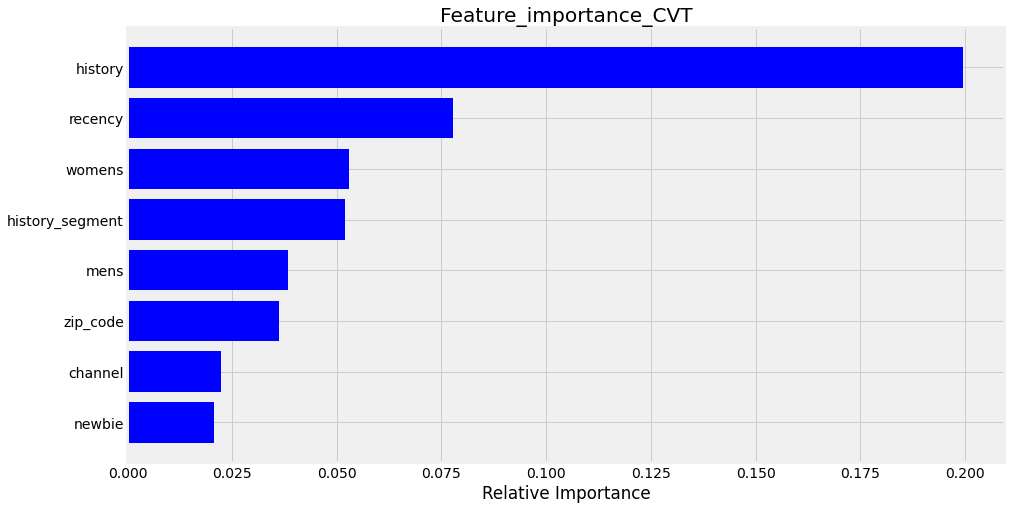

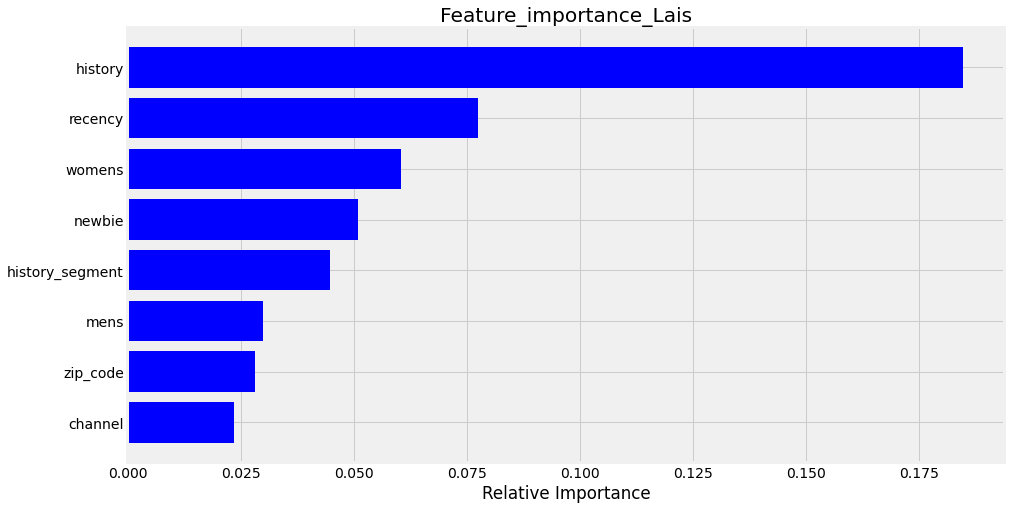

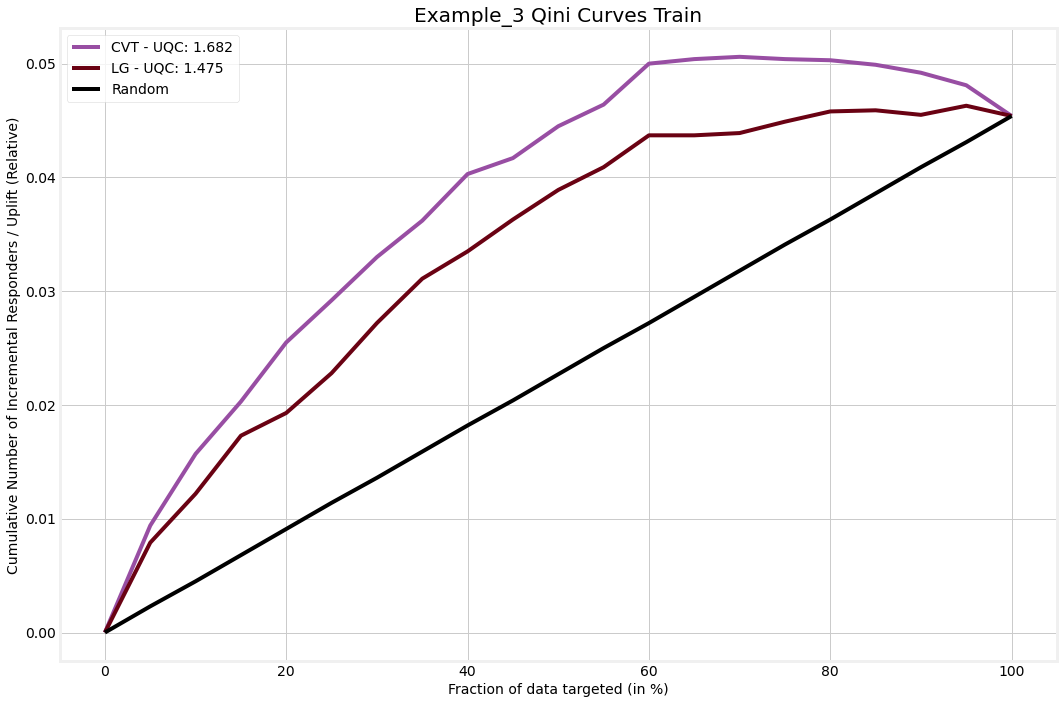

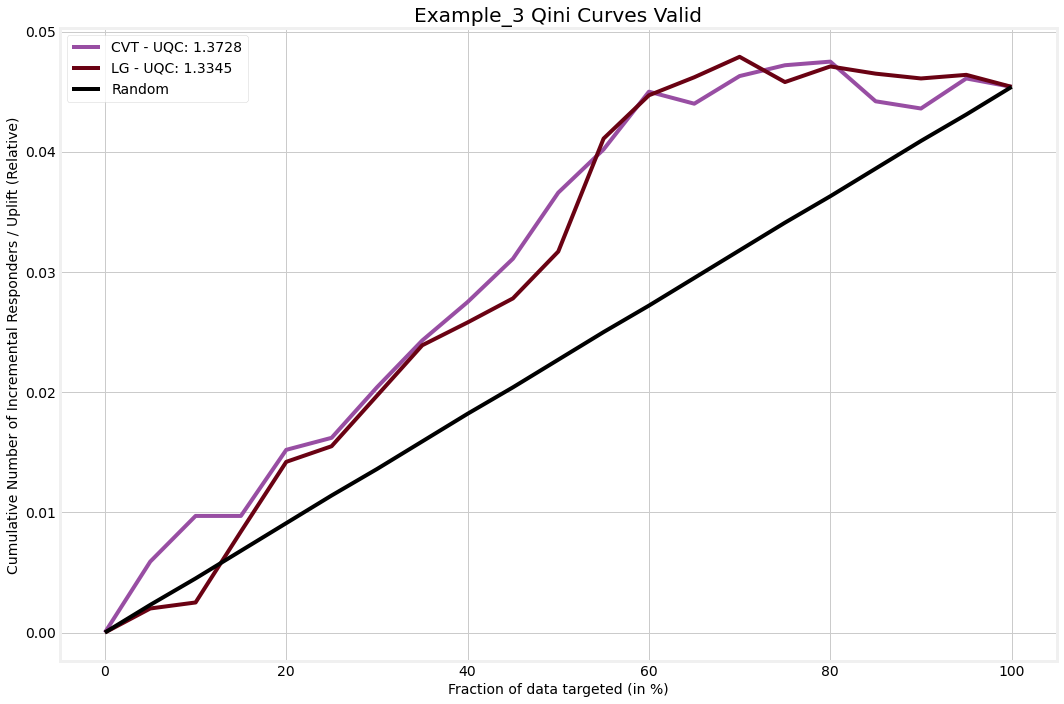

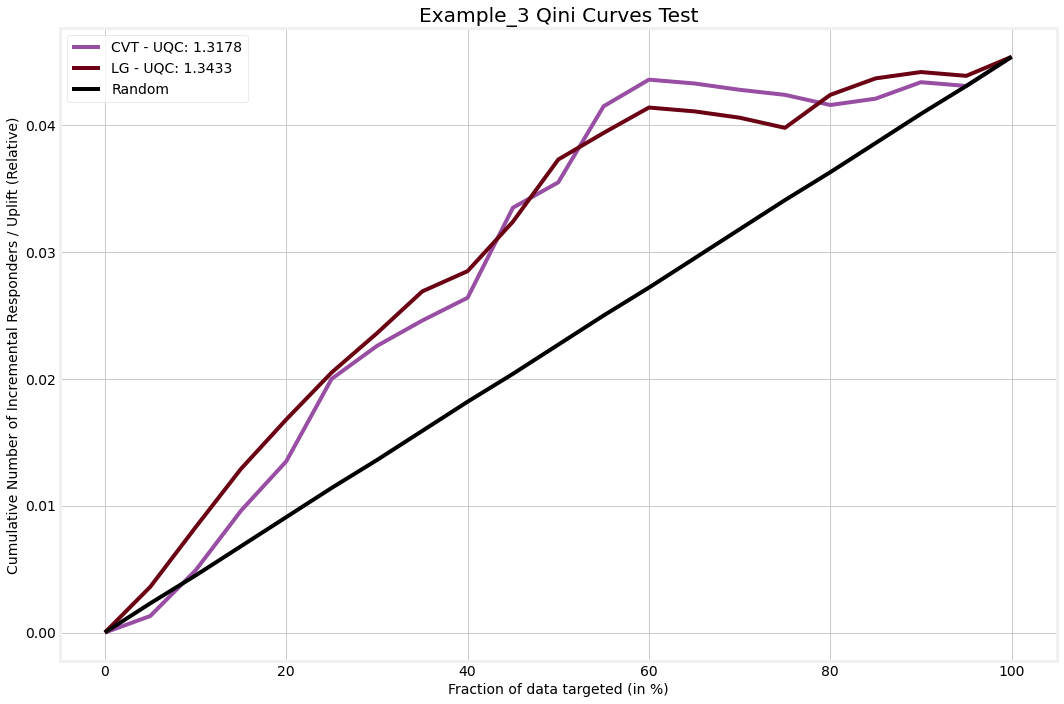

In [12]:
pipeline.analyze_dataset(data)

Enjoy AutoUplift!